# Diabetes Prediction Project

In [2]:
!pip install pandas matplotlib seaborn

In [3]:
#Understanding data set
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0            146.4  88.5   
2       

In [4]:
# As we see the Alcohol_comsumption has 3320 null values so data cleaning and data preprocessing
df=df.drop_duplicates()
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numeric columns only
        df[col] = df[col].fillna(df[col].mean())  # Assign back to the column
df.columns=df.columns.str.lower()
print(df.columns)

Index(['unnamed: 0', 'age', 'sex', 'ethnicity', 'bmi', 'waist_circumference',
       'fasting_blood_glucose', 'hba1c', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'cholesterol_total', 'cholesterol_hdl',
       'cholesterol_ldl', 'ggt', 'serum_urate', 'physical_activity_level',
       'dietary_intake_calories', 'alcohol_consumption', 'smoking_status',
       'family_history_of_diabetes', 'previous_gestational_diabetes'],
      dtype='object')


# Exploratory Data Analysis

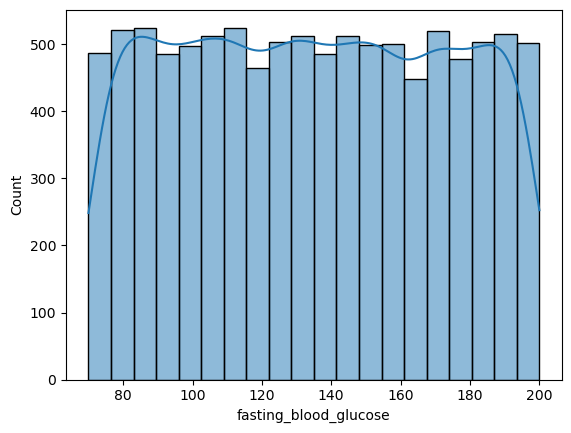

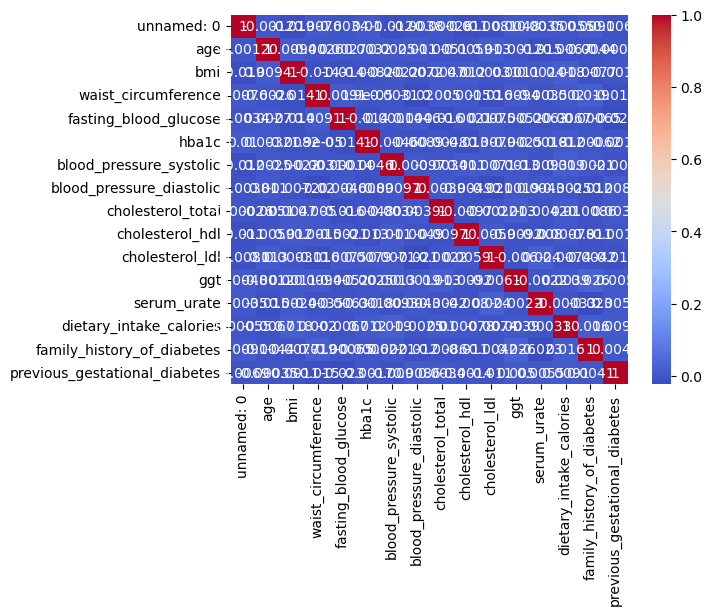

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of glucose levels
sns.histplot(df['fasting_blood_glucose'], bins=20, kde=True)
plt.show()

# Select numeric columns only
df_numeric = df.select_dtypes(include=['number'])

sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

# Handling Outliers

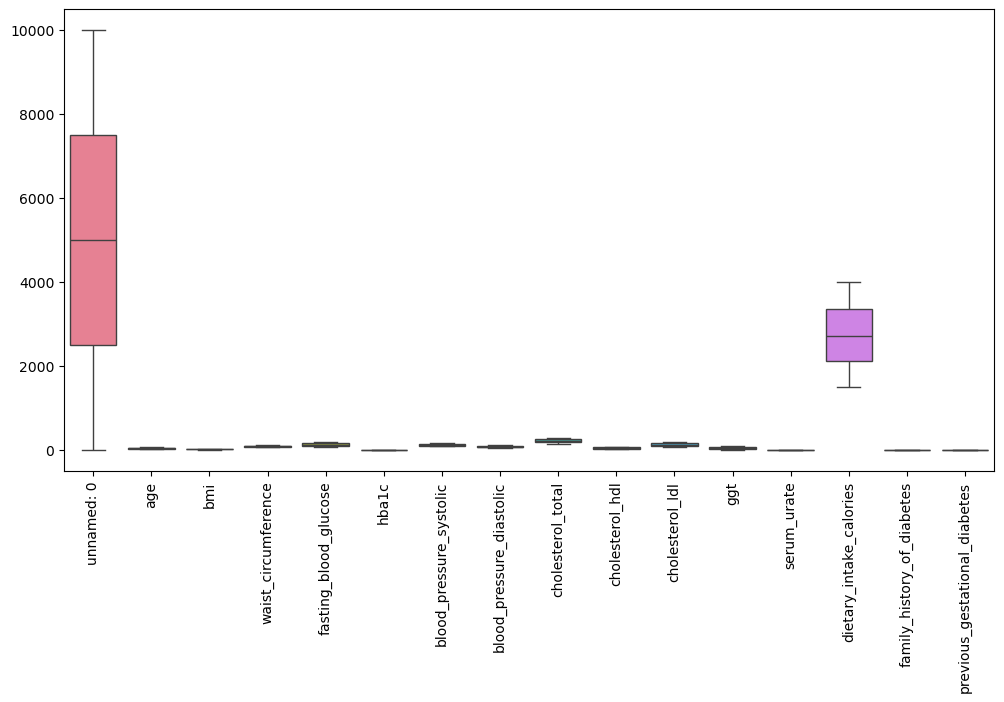

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.show()


# Remove Outliers through IQR Method

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df_numeric[(df_numeric >= Q1 - 1.5 * IQR) & (df_numeric <= Q3 + 1.5 * IQR)]


# StandardScaler


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

In [14]:
#Step 2: Split Data for Training & Testing
from sklearn.model_selection import train_test_split

X = df_scaled  # Features
y = df['family_history_of_diabetes']  # Replace with actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#step 3 RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Number of features in training data:", X_train.shape[1])  # Should be 16

# Evaluate accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Number of features in training data: 16
Model Accuracy: 1.0


In [16]:
#Step 4: Optimize Model Performance
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [17]:
#Step 5: Save & Deploy Your Model
import joblib
joblib.dump(model, "diabetes_prediction.pkl")

['diabetes_prediction.pkl']

In [18]:
#Next, build a Flask or Streamlit app for live predictions
!pip install flask joblib